<a href="https://colab.research.google.com/github/ife-dolapo/Predicting-House-Prices/blob/main/Assignment_8_Supervised_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler


# Load dataset
realestate_df = pd.read_csv('Real estate.csv')
print(realestate_df.head().to_string())

# Preprocessing steps
realestate_df.info()
realestate_df.describe()

   No  house age  distance to the nearest MRT station  number of convenience stores  latitude  longitude  house price of unit area
0   1       32.0                             84.87882                            10  24.98298  121.54024                      37.9
1   2       19.5                            306.59470                             9  24.98034  121.53951                      42.2
2   3       13.3                            561.98450                             5  24.98746  121.54391                      47.3
3   4       13.3                            561.98450                             5  24.98746  121.54391                      54.8
4   5        5.0                            390.56840                             5  24.97937  121.54245                      43.1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --

,No,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [11]:
realestate_df.columns

Index(['No', 'house age', 'distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude',
       'house price of unit area'],
      dtype='object')

In [2]:
# Check for null values and duplicates
print("Missing values:")
print(realestate_df.isnull().sum())
print("\nDuplicate values:")
print(realestate_df.duplicated().sum())

Missing values:
No                                     0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

Duplicate values:
0


In [3]:
# Check for multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Prepare the feature matrix
X = realestate_df[['house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude']]
X = add_constant(X)  # Adds intercept term

# Calculate VIF for each feature
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[ 1 ])], index=X.columns)
print("VIF:")
print(vif)


VIF:
const                                  1.987330e+08
house age                              1.014249e+00
distance to the nearest MRT station    4.282985e+00
number of convenience stores           1.613339e+00
latitude                               1.599017e+00
longitude                              2.923881e+00
dtype: float64


In [4]:
# Split dataset into train and test set

# Seperate features and target
X = realestate_df.drop(['No', 'house price of unit area'], axis=1)
y = realestate_df['house price of unit area']
print("Features colums:")
print(X.head().to_string())

# Initialize Standard Scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to dataframe
X = pd.DataFrame(X_scaled, columns=X.columns)
print("Features scaled data with colums:")
print(X.head().to_string())

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Features colums:
   house age  distance to the nearest MRT station  number of convenience stores  latitude  longitude
0       32.0                             84.87882                            10  24.98298  121.54024
1       19.5                            306.59470                             9  24.98034  121.53951
2       13.3                            561.98450                             5  24.98746  121.54391
3       13.3                            561.98450                             5  24.98746  121.54391
4        5.0                            390.56840                             5  24.97937  121.54245
Features scaled data with colums:
   house age  distance to the nearest MRT station  number of convenience stores  latitude  longitude
0   1.255628                            -0.792495                      2.007407  1.125430   0.448762
1   0.157086                            -0.616612                      1.667503  0.912444   0.401139
2  -0.387791                            

<Figure size 800x600 with 0 Axes>

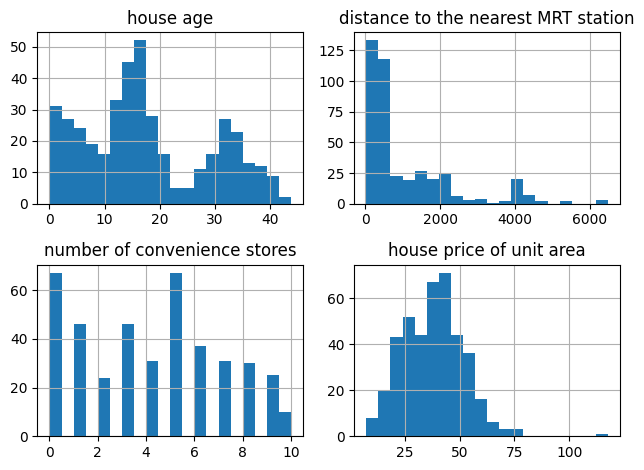

In [31]:
# Task 2: Exploratory Data Analysis
# Exploratory data analysis to visualize and summarize the data
# Distribution of classes
plt.figure(figsize=(8, 6))
realestate_df[['house age','distance to the nearest MRT station', 'number of convenience stores', 'house price of unit area']].hist(bins=20)
plt.tight_layout()
plt.show()


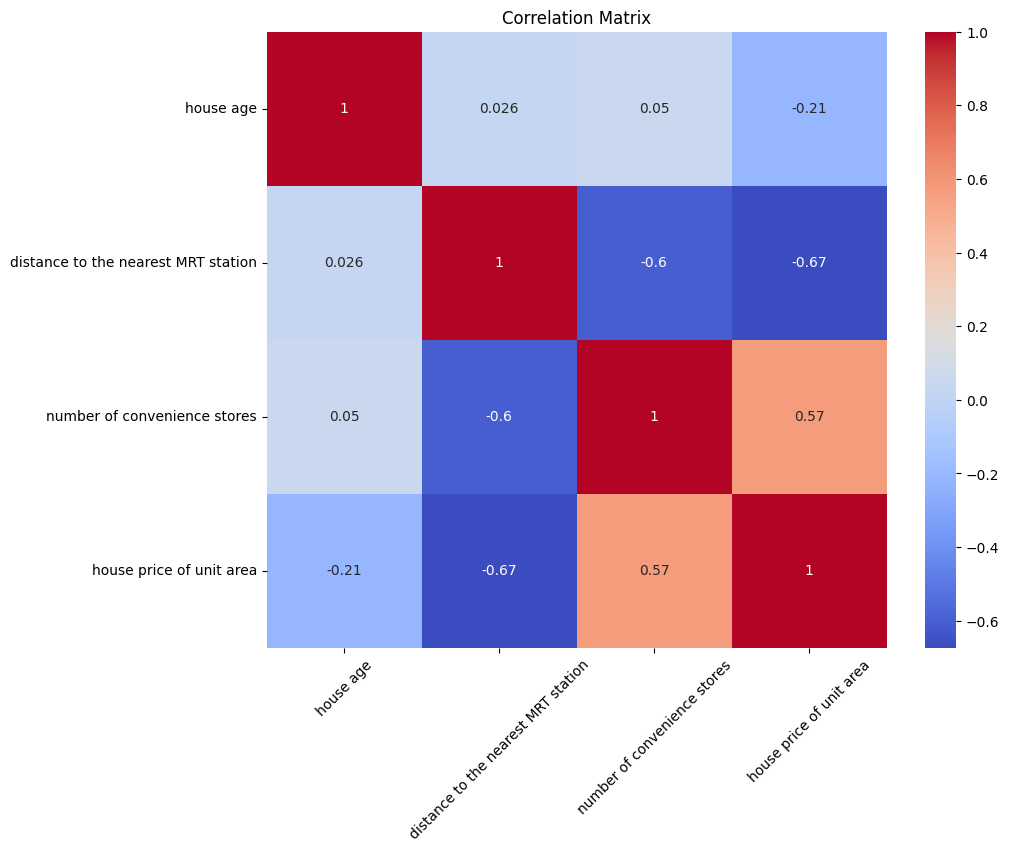

In [34]:
# Task 2 contd: Exploratory Data Analysis
# Correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(realestate_df[['house age',
                           'distance to the nearest MRT station',
                           'number of convenience stores',
                           'house price of unit area']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**Insights from the Exploration**

The distribution of the distance to the nearest MRT station shows it is highly right-skewed as most houses are close to the MRT stations and only few are extremely far (up to 6488 meters). This could bias distance-sensistive models like KNN or affect decision boundaries in tree-based models.

The House price per unit area is also right skewed, considering the fact that linear regression is one of the classifier choice for the dataset, applying a log transformation on the price and Distance to MRT column will help to even out the distribution since linear regression assumes normally distributed residuals.

Distance to MRT and number of convenience stores are strongly correlated (-0.6), which can inflate standard errors and distort coefficient estimates. I used the VIF (Variance Inflation Factor) to detect which feature has a high multicollinearity (>10). This helped in making the decision on which feature to drop or not. They all appeared to have low multicoillinearity but the distance to MRT station is one to watch out for.

In [7]:
# Task 3: Model Implementation and Evaluation
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance
print(f"Mean Squared Error: {mse:2f}")
print(f"R-squared: {r2:2f}")


# Train on KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on test set
knn_y_pred = knn_model.predict(X_test)

# Evalaute performance
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

# Print the performance
print(f"KNN Mean Squared Error: {knn_mse:2f}")
print(f"KNN R-squared: {knn_r2:2f}")

# Train on KNN (n=3)
knn_model3 = KNeighborsRegressor(n_neighbors=3)
knn_model3.fit(X_train, y_train)

# Predict on test set
knn_y_pred3 = knn_model3.predict(X_test)

# Evaluate performance
knn_mse3 = mean_squared_error(y_test, knn_y_pred3)
knn_r23 = r2_score(y_test, knn_y_pred3)

# Print performance
print(f"KNN (n=3) Mean Squared Error: {knn_mse3:2f}")
print(f"KNN (n=3) R-squared: {knn_r23:2f}")

Mean Squared Error: 54.580945
R-squared: 0.674648
KNN Mean Squared Error: 44.829080
KNN R-squared: 0.732778
KNN (n=3) Mean Squared Error: 32.117952
KNN (n=3) R-squared: 0.808548


**Model Interpretation and Inference:**

**Linear Regression**
*   MSE: 54.58
*   R²: 0.6746

**Interpretation**: The model explains about 67% of the variance in house prices. While coefficients are interpretable, the linear assumption limits its ability to capture complex relationships (e.g., nonlinear effects of MRT distance or clustering of convenience stores).

**KNN Regression (k=5)**


*   MSE: 44.83
*   R²: 0.7328

**Interpretation:** Improved performance over linear regression by leveraging local patterns. However, still not optimal in capturing finer price variations.

**KNN Regression (k=3)**

*   MSE: 32.12
*   R²: 0.8085

**Interpretation**: Best-performing model. It captures neighborhood-level price dynamics more effectively, especially in areas with similar convenience store counts or MRT proximity. The lower 'k' allows for more sensitive local predictions, which suits this housing dataset well.

**Overall**

KNN with k=3 performed best, achieving the lowest Mean Squared Error (32.12) and highest R² score (0.81), indicating superior predictive accuracy and variance explanation compared to Linear Regression.

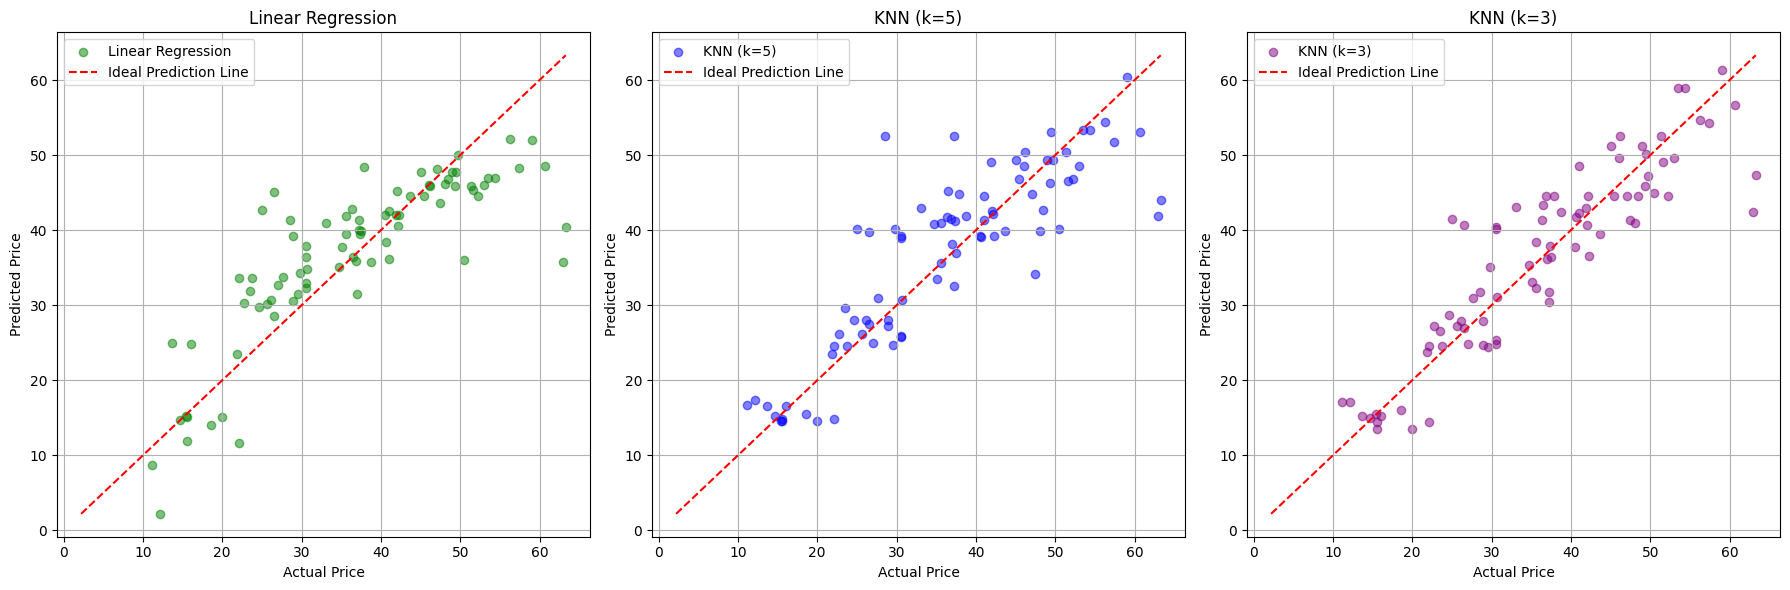

In [12]:
# Visualization of Actual vs Predicted
# Subplots with scatterplots for each model
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# For reference line y=x
min_val = min(y_test.min(), y_pred.min(), knn_y_pred.min(), knn_y_pred3.min())
max_val = max(y_test.max(), y_pred.max(), knn_y_pred.max(), knn_y_pred3.max())

# Linear Regression
axs[0].scatter(y_test, y_pred, alpha=0.5, label='Linear Regression', color='green')
axs[0].plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction Line')
axs[0].set_title('Linear Regression')
axs[0].set_xlabel('Actual Price')
axs[0].set_ylabel('Predicted Price')
axs[0].legend()
axs[0].grid(True)

# KNN (k=5)

axs[1].scatter(y_test, knn_y_pred, alpha=0.5, label='KNN (k=5)', color='blue')
axs[1].plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction Line')
axs[1].set_title('KNN (k=5)')
axs[1].set_xlabel('Actual Price')
axs[1].set_ylabel('Predicted Price')
axs[1].legend()
axs[1].grid(True)

# KNN (k=3)
axs[2].scatter(y_test, knn_y_pred3, alpha=0.5, label='KNN (k=3)', color='purple')
axs[2].plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction Line')
axs[2].set_title('KNN (k=3)')
axs[2].set_xlabel('Actual Price')
axs[2].set_ylabel('Predicted Price')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


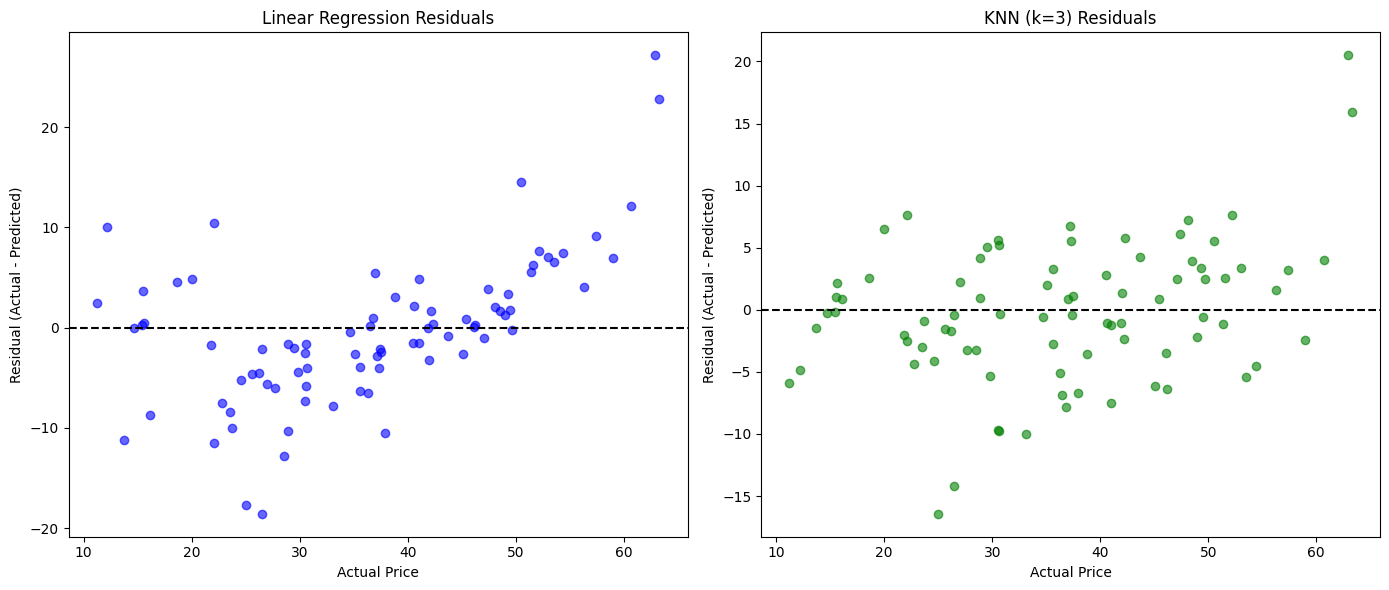

In [13]:
# Visualizing with Residuals Plots
# Calculate residuals
residuals_lr = y_test - y_pred
residuals_knn = y_test - knn_y_pred3

# Create figure for residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Residuals for Linear Regression
axes[0].scatter(y_test, residuals_lr, color='blue', alpha=0.6)
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_title('Linear Regression Residuals')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Residual (Actual - Predicted)')

# Residuals for KNN
axes[1].scatter(y_test, residuals_knn, color='green', alpha=0.6)
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_title('KNN (k=3) Residuals')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Residual (Actual - Predicted)')

plt.tight_layout()
plt.show()




**Inference**

• KNN (k=3) is the best model for this dataset, outperforming linear regression in both accuracy and variance explanation.

• The housing data benefits from nonlinear modeling, especially due to spatial and categorical interactions (e.g., MRT proximity, convenience store clustering).

• Linear regression remains valuable for interpretability and business impact communication, especially when explaining feature influence.


**Task 5: Deployment and Monitoring:**

I propose deploying the KNN (k=3) model as a containerized REST API using FastAPI and Docker, hosted on a cloud platform like Azure App Service or Google Cloud Run. This method balances scalability, portability, and real-time prediction capability, while keeping the deployment modular and maintainable.

**Potential Deployment Issues**
1.  ** Latency**
- KNN computes distances at prediction time - slow for large datasets.
- To resolve this,the use of KD-Trees or approximate nearest neighbors (e.g.,faiss)
2.   **Input Validation**
- Incoming data may be malformed or missing.
- Solution: Validate schema with pydantic in FastAPI.
1.   **Data Drift**
- Real-time data may shift over time.
- Solution: Monitor feature distributions and retrain periodically

**Monitoring and Maintenance**
1.   Performance Monitoring
- Track:
  *   Prediction latency
  *   RMSE on live data
  *   Frequency of outliers
  *   Use tools like Prometheus + Grafana or Azure Monitor
2.   Drift Detection
- Use statistical tests (e.g., PSI, KS test) to detect changes in input distributions
3.   Retraining Strategy
- Schedule retraining weekly/monthly based on data volume
- Automate with Airflow, Prefect, or cloud-native pipelines
4.   Logging and Alerts
- Log inputs, predictions, and errors
- Set alerts for:
  * High error rates
  * Unusual input patterns



